In [1]:
import mesa

# Data visualization tools.
import seaborn as sns

# Has multi-dimensional arrays and matrices. Has a large collection of
# mathematical functions to operate on these arrays.
import numpy as np

# Data manipulation and analysis.
import pandas as pd

In [5]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's attribute and set the initial values.
        self.wealth = 1

    def say_hi(self):
        # The agent's step will go here.
        # For demonstration purposes we will print the agent's unique_id
        print(f"Hi, I am an agent, you can call me {str(self.unique_id)}.")


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n

        # Create n agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("say_hi")

In [6]:
starter_model = MoneyModel(10)
starter_model.step()

Hi, I am an agent, you can call me 4.
Hi, I am an agent, you can call me 1.
Hi, I am an agent, you can call me 9.
Hi, I am an agent, you can call me 6.
Hi, I am an agent, you can call me 8.
Hi, I am an agent, you can call me 5.
Hi, I am an agent, you can call me 7.
Hi, I am an agent, you can call me 10.
Hi, I am an agent, you can call me 3.
Hi, I am an agent, you can call me 2.


In [7]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        # Pass the parameters to the parent class.
        super().__init__(model)

        # Create the agent's variable and set the initial values.
        self.wealth = 1

    def exchange(self):
        # Verify agent has some wealth
        if self.wealth > 0:
            other_agent = self.random.choice(self.model.agents)
            if other_agent is not None:
                other_agent.wealth += 1
                self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n):
        super().__init__()
        self.num_agents = n

        # Create agents
        MoneyAgent.create_agents(model=self, n=n)

    def step(self):
        """Advance the model by one step."""

        # This function psuedo-randomly reorders the list of agent objects and
        # then iterates through calling the function passed in as the parameter
        self.agents.shuffle_do("exchange")

In [8]:
model = MoneyModel(10)  # Tells the model to create 10 agents
for _ in range(
    30
):  # Runs the model for 10 steps; an underscore is common convention for a variable that is not used
    model.step()

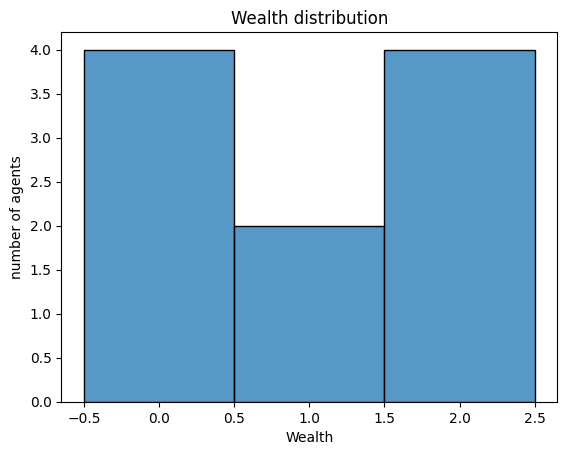

In [9]:
agent_wealth = [a.wealth for a in model.agents]
# Create a histogram with seaborn
g = sns.histplot(agent_wealth, discrete=True)
g.set(
    title="Wealth distribution", xlabel="Wealth", ylabel="number of agents"
);  # The semicolon is just to avoid printing the object representation

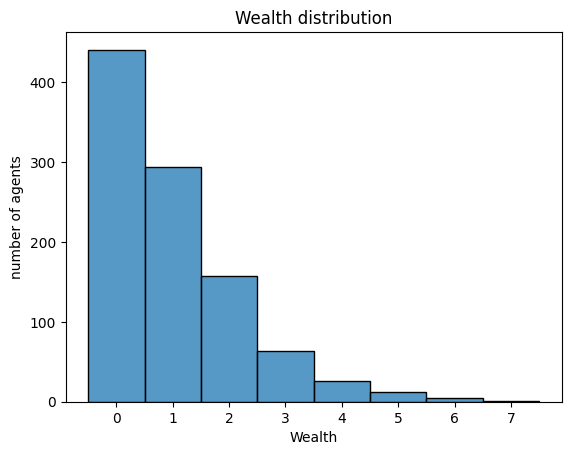

In [10]:
all_wealth = []
# This runs the model 100 times, each model executing 10 steps.
for _ in range(100):
    # Run the model
    model = MoneyModel(10)
    for _ in range(30):
        model.step()

    # Store the results
    for agent in model.agents:
        all_wealth.append(agent.wealth)

# Use seaborn
g = sns.histplot(all_wealth, discrete=True)
g.set(title="Wealth distribution", xlabel="Wealth", ylabel="number of agents");

In [11]:
class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = mesa.space.MultiGrid(width, height, True)

        # Create agents
        agents = MoneyAgent.create_agents(model=self, n=n)
        # Create x and y positions for agents
        x = self.rng.randint(0, self.grid.width, size=(n,))
        y = self.rng.randint(0, self.grid.height, size=(n,))
        for a, i, j in zip(agents, x, y):
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (i, j))

In [10]:
neighbors = []
x, y = self.pos
for dx in [-1, 0, 1]:
    for dy in [-1, 0, 1]:
        neighbors.append((x+dx, y+dy))

NameError: name 'self' is not defined

In [12]:
class MoneyAgent(mesa.Agent):
   #...
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

In [13]:
class MoneyAgent(mesa.Agent):
    #...
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Ensure agent is not giving money to itself
        cellmates.pop(
            cellmates.index(self)
        )
        if len(cellmates) > 0:
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1

In [14]:
class MoneyAgent(mesa.Agent):
    """An agent with fixed initial wealth."""

    def __init__(self, model):
        super().__init__(model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos, moore=True, include_center=False
        )
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)

    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        # Ensure agent is not giving money to itself
        cellmates.pop(cellmates.index(self))
        if len(cellmates) > 0:
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1


class MoneyModel(mesa.Model):
    """A model with some number of agents."""

    def __init__(self, n, width, height, seed=None):
        super().__init__(seed=seed)
        self.num_agents = n
        self.grid = mesa.space.MultiGrid(width, height, True)

        # Create agents
        agents = MoneyAgent.create_agents(model=self, n=n)
        # Create x and y coordinates for agents
        x = self.rng.integers(0, self.grid.width, size=(n,))
        y = self.rng.integers(0, self.grid.height, size=(n,))
        for a, i, j in zip(agents, x, y):
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (i, j))

    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [15]:
model = MoneyModel(100, 10, 10)
for _ in range(20):
    model.step()

In [16]:
class MoneyAgent(mesa.Agent):
    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1

    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos,moore = True, include_center = False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self,new_position)
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        
        cellmates.pop(cellmates.index(self))
        if(len(cellmates) > 0):
            other_agent = self.random.choice(cellmates)
            other_agent.wealth += 1
            self.wealth -= 1

class MoneyModel(mesa.Model):
    def __init__(self,n,width,height,seed = None):
        super().__init__(seed = seed)
        self.num_agents = n
        self.grid = mesa.space.MultiGrid(width, height, True)

        # Create agents
        agents = MoneyAgent.create_agents(model=self, n=n)
        # Create x and y coordinates for agents
        x = self.rng.integers(0, self.grid.width, size=(n,))
        y = self.rng.integers(0, self.grid.height, size=(n,))
        for a, i, j in zip(agents, x, y):
            # Add the agent to a random grid cell
            self.grid.place_agent(a, (i, j))
        
    def step(self):
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [17]:
# lets create a mdoel with 100 agents on a 10*10 grid , and run it for 20 steps
mode = MoneyModel(100,20,10)
for _ in range(20):
    model.step()

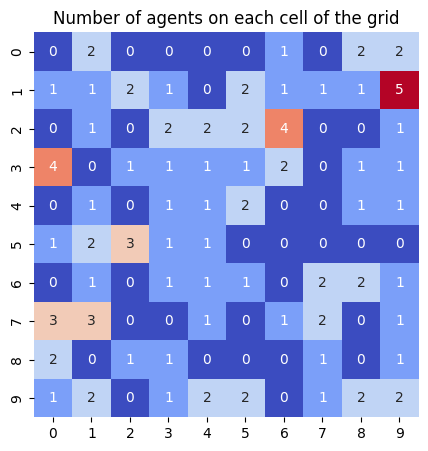

In [20]:
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell_content, (x,y) in model.grid.coord_iter():
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count

g = sns.heatmap(agent_counts, cmap = "coolwarm",annot = True, cbar = False, square = True)
g.figure.set_size_inches(5,5)
g.set(title = "Number of agents on each cell of the grid");

# Collecting the data

In [54]:
def compute_gini (model):
    agent_wealths = [agent.wealth for agent in model.agents]
    x = sorted (agent_wealths)
    n = model.num_agents
    B = sum(xi*(n-i) for i , xi in enumerate(x))/(n*sum(x))
    return 1+ (1/n) - 2 * B

class MoneyAgent(mesa.Agent):
    def __init__(self,model):
        super().__init__(model)
        self.wealth = 1
    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(self.pos , moore = True, include_center = False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
    
    def give_money(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        cellmates.pop(cellmates.index(self))
        if len(cellmates)> 0 :
            other = self.random.choice(cellmates)
            other.wealth += 1
            self.wealth -= 1
    
class MoneyModel (mesa.Model):
    def __init__(self, n, width, height):
        super().__init__()
        self.num_agents = n
        # creating the space 
        self.grid = mesa.space.MultiGrid(width, height , True)
        # collecting the output
        self.datacollector = mesa.DataCollector(model_reporters = {"Gini":compute_gini}, agent_reporters = {"Wealth":"wealth"})
    
        # creating the agents 
        agents = MoneyAgent.create_agents(model = self, n = n )
        # creating the x and y positions for agents 
        x = self.rng.integers(0,self.grid.width, size = (n,))
        y = self.rng.integers(0, self.grid.height, size= (n,))
        for a, i, j in zip(agents, x,y):
            self.grid.place_agent(a,(i,j))
    def step(self):
        self.datacollector.collect(self)
        self.agents.shuffle_do("move")
        self.agents.do("give_money")

In [55]:
model = MoneyModel(200,10,1)
for _ in range(100):
    model.step()

[Text(0.5, 1.0, 'Gini Coefficient over Time'),
 Text(0, 0.5, 'Gini Coefficient')]

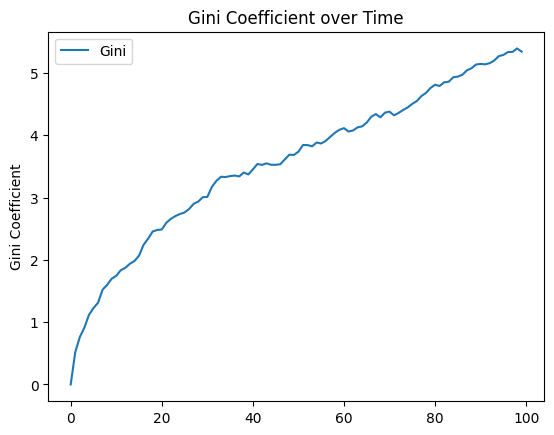

In [56]:
prashant = model.datacollector.get_model_vars_dataframe()
# Plotting the gini coefficient over time
g = sns.lineplot(data = prashant)
g.set(title = "Gini Coefficient over Time", ylabel = "Gini Coefficient")

In [60]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
1    1             1
     2             1
     3             1
     4             1
     5             1

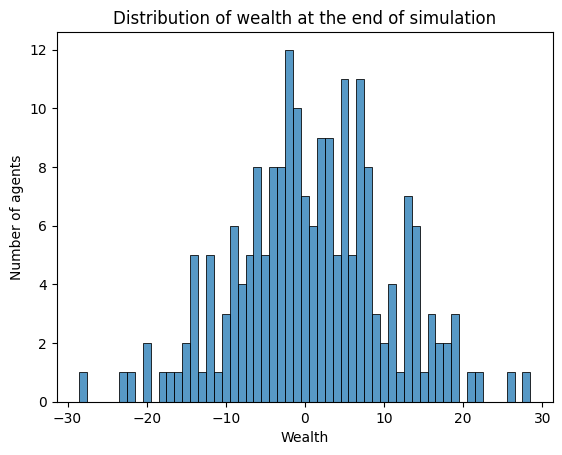

In [59]:
last_step = agent_wealth.index.get_level_values("Step").max()
end_wealth = agent_wealth.xs(last_step, level = "Step")["Wealth"]

# creating a histogram of wealth at the last step
g = sns.histplot(end_wealth, discrete = True)
g.set(title = "Distribution of wealth at the end of simulation", xlabel = "Wealth", ylabel = "Number of agents",
);


[Text(0.5, 1.0, 'Wealth of agent 100 over time')]

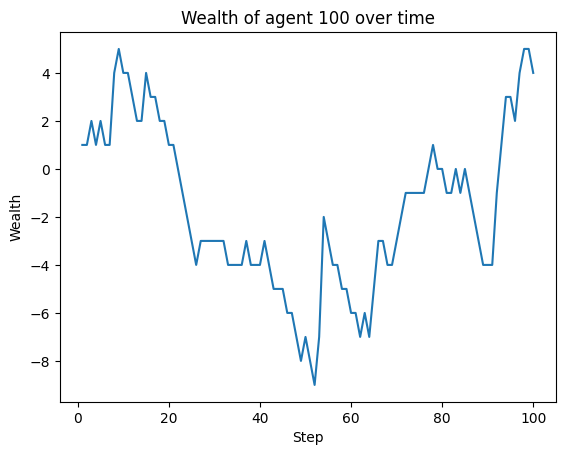

In [64]:
# Get the wealth of agent 100 over time
one_agent_wealth = agent_wealth.xs(100, level = "AgentID")

# Plot the wealth of agent 100 over time
g = sns.lineplot(data = one_agent_wealth, x = "Step", y = "Wealth")
g.set(title = "Wealth of agent 100 over time")

[Text(0.5, 1.0, 'wealth of multiple agents over time')]

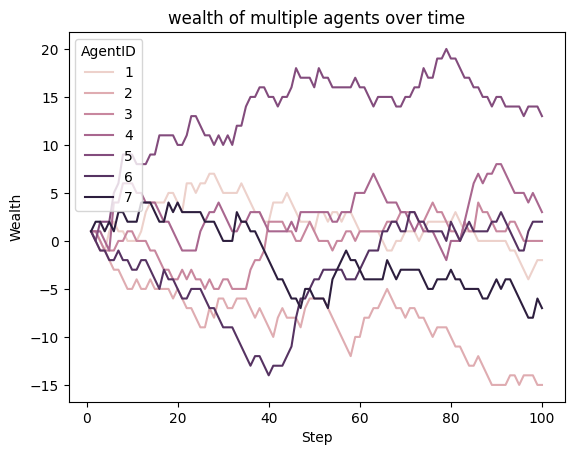

In [73]:
# Plotting a reporter of multiple agents over time
agent_list= [] 

multiple_agents_wealth = agent_wealth[agent_wealth.index.get_level_values("AgentID").isin(agent_list)]

g = sns.lineplot(data = multiple_agents_wealth, x = "Step", y = "Wealth", hue = "AgentID")
g.set(title = "wealth of multiple agents over time")

[Text(0.5, 1.0, 'Average wealth over time')]

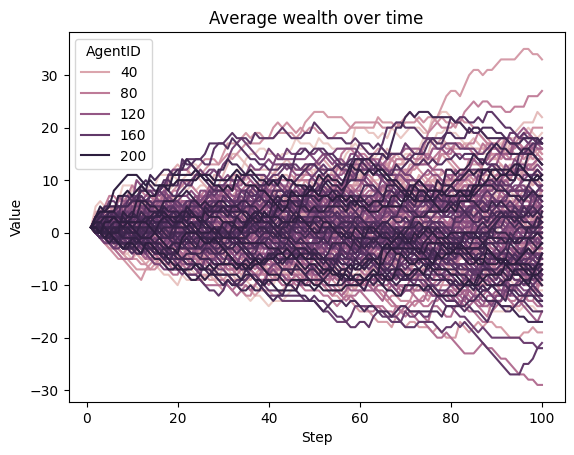

In [82]:
# we can also plot the average of all agents , with a 95% confidence interval for that average

# transforming the data to a long format
agent_wealth_long = agent_wealth.T.unstack().reset_index()
agent_wealth_long.columns = ["Step", "AgentID", "Variable", "Value"]
agent_wealth_long.head(3)

g= sns.lineplot(data = agent_wealth_long, x= "Step", y = "Value", errorbar = ("ci", 95), hue = "AgentID" )
g.set(title = "Average wealth over time")

In [86]:
gini.to_csv("model_data.csv")
agent_wealth.to_csv("agent_data.csv")